# Part I - Exploration of House Sales Dataset
## by Abdulwasiu Abdulraheem

## Introduction
> This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load the dataset 
data='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df=pd.read_csv(data)

In [3]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.head(10))

(21613, 22)
Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object
   Unnamed: 0          id             date      price  bedrooms  bathrooms  \
0           0  7129300520  20141013T000000   221900.0       3.0       1.00   
1           1  6414100192  20141209T000000   538000.0       3.0       2.25   
2           2  5631500400  20150225T000000   180000.0       2.0       1.00   
3           3  2487200875  20141209T000000   604000.0       4.0       3.00   
4           4  1954400510  2015021

In [4]:
# drop id and Unnamed columns
df.drop(columns=['id','Unnamed: 0'], inplace = True)

# view the new data shape
df.shape

(21613, 20)

In [5]:
# view the items in condition columns

df['condition'].unique()

array([3, 5, 4, 1, 2])

In [6]:
# view the items in grade columns
set(df['grade'])

{1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

In [7]:
# view the items in waterfront columns
df['waterfront'].unique()

array([0, 1])

- Using the information on this page: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r, I will code the bulding condition as 1 = Poor, 2 = Fair, 3 = Average,  4 = Good, 5= Very Good and convert the variable to ordered categorical data. <br>
- I will convert the grade column to ordered categorical data. <br>
- I will code waterfront as 0 = No, 1 = Yes and convert to categorical data.



In [8]:
# change data in condition to descriptive label
df['condition'] = df['condition'].astype(str)
df['condition'] = df['condition'].replace(['3', '5', '4', '1', '2'], ['Average','Very Good','Good','Poor','Fair'])

df['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [9]:
# change data in waterfront to descriptive labels
df['waterfront'] = df['waterfront'].replace([0,1], ['No', 'Yes'])
df['waterfront'].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
# convert waterfront into categorical type
df['waterfront'] = pd.Categorical(df.waterfront)
df.waterfront.dtype

CategoricalDtype(categories=['No', 'Yes'], ordered=False)

In [11]:
# convert condition and grade into ordered categorical types
ordinal_var_dict = {'condition': ['Poor','Fair','Average','Good','Very Good'],
                    'grade': [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [12]:
# descriptive statistics for numeric variables
print(df.describe())

              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21600.000000  21603.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.372870      2.115736   2079.899736  1.510697e+04   
std    3.671272e+05      0.926657      0.768996    918.440897  4.142051e+04   
min    7.500000e+04      1.000000      0.500000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors          view    sqft_above  sqft_basement      yr_built  \
count  21613.000000  21613.000000  21613.000000   21613.000000  21613.000000   
mean       1.494309      0.234303   1788.390691     291.509045   1971.005136   
std        0.539989      0.766318    828.090978 

In [13]:
# replace missing values in bedrooms with the average value
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)


In [14]:
# replace missing values in bathroom with the average value
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [15]:
df.shape

(21613, 20)

### What is the structure of your dataset?

> There are 21613 house sales prices with 20 features ('date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'). Most variables are numeric in nature, but the variable waterfront is a nominal categorical variable while variables condition and grade are ordered factor variables with the following levels. <br>
  
> (worst) ——> (best) <br>
condition: Poor, Fair, Average, Good, Very Good <br>
grade: 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13 <br>
  


### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best for predicting the house sales price in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
> I expect that sqft_living i.e The square footage of the home and grade will have the strongest effect on each house sale's price: the bigger the square footage of the house, the higher the price; and the higher the grade given to the house, the higher the price. Also, I expect other house features such as: Number of bathrooms, Number of bedrooms, the overall condition and whether the house has a view to a waterfront or not to also have effects on the price, though to a smaller degree than the main effects of square footage of the home and overall grade giving to the housing unit.


## Univariate Exploration



Let's first look at the distribution of the main variable of interest: price.

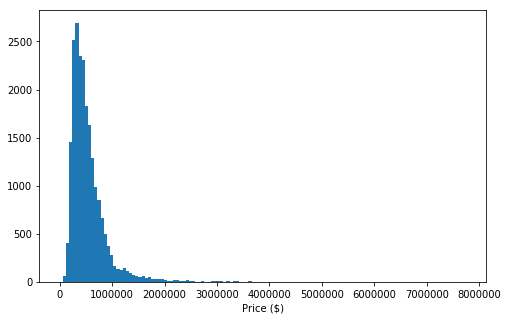

In [16]:
# start with a standard-scaled plot
binsize = 60000
bins = np.arange(0, df['price'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'price', bins = bins)
plt.xlabel('Price ($)')

plt.show()


The price data is right-skewed. Let's apply log transformation to achieve a normal distribution. 

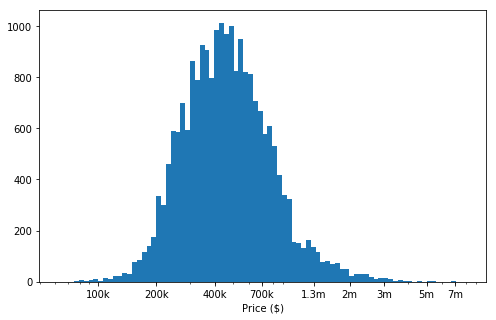

In [17]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(4.8, np.log10(df['price'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'price', bins = bins)
plt.xscale('log')
plt.xticks([100000, 200000, 400000, 700000, 1300000, 2000000,3000000,5000000, 7000000], ['100k', '200k', '400k',  '700k', '1.3m', '2m', '3m', '5m', '7m'])
plt.xlabel('Price ($)')
plt.show()


Price has a long-tailed distribution, with a lot of house sales on the low price end, and very few on the high price end. When the new data plotted on a log-scale, the price distribution looks bimodal, with two peaks between 300,000 and 500,000. 


Next up, the first predictor variable of interest: sqft_living i.e the square footage of the home.

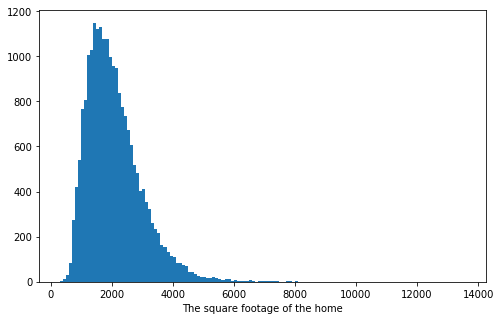

In [18]:
# plotting sqft_living on a standard scale

binsize = 100
bins = np.arange(290, df['sqft_living'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'sqft_living', bins = bins)

plt.xlabel('The square footage of the home')
plt.show()

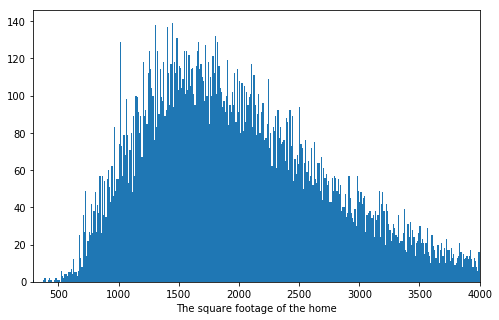

In [19]:
# the square footage distribution is also right-skewed
# let's investigate further by setting x lim to house within 4000 square footage and reduce the bin size

binsize = 10
bins = np.arange(290, df['sqft_living'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'sqft_living', bins = bins)
plt.xlim(290, 4000)
plt.xlabel('The square footage of the home')
plt.show()


This distribution shows that the square footage of typical home in King County lies between 1000 and 2500. 

Let's move to the distribution of other variable of interest: grade, waterfront and condition.

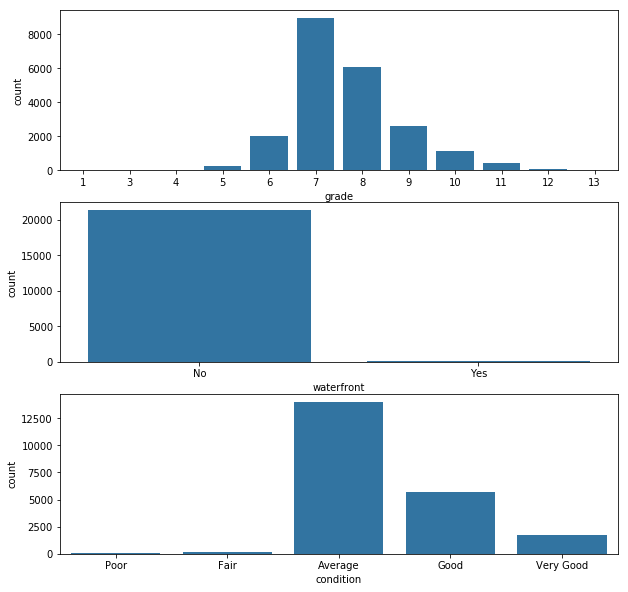

In [20]:
# plot the distribution of these categorical variables: grade, waterfront and condition


fig, ax = plt.subplots(nrows=3, figsize = [10,10])

default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'grade', color = default_color, ax = ax[0])
sb.countplot(data = df, x = 'waterfront', color = default_color, ax = ax[1])
sb.countplot(data = df, x = 'condition', color = default_color, ax = ax[2])

plt.show()

Though houses that have maximum grade (i.e grade 13) are quite few, most houses  are of good grade. Most are graded as 7, followed by grade 8.  Number of houses that have a view to a waterfront are signifantly lower than houses without a view to waterfront. Most houses are in average condition or better. 

Let's move to other variable of interest: bedrooms and bathrooms.

In [21]:
# before we plot their distributions, let's convert bedrooms and bathrooms variables from float to integer datatype 

df['bedrooms'] = df['bedrooms'].astype(int)
df['bathrooms'] = df['bathrooms'].astype(int)

In [22]:
# confirm changes

print(df['bedrooms'].dtype)
print(df['bathrooms'].dtype)

int64
int64


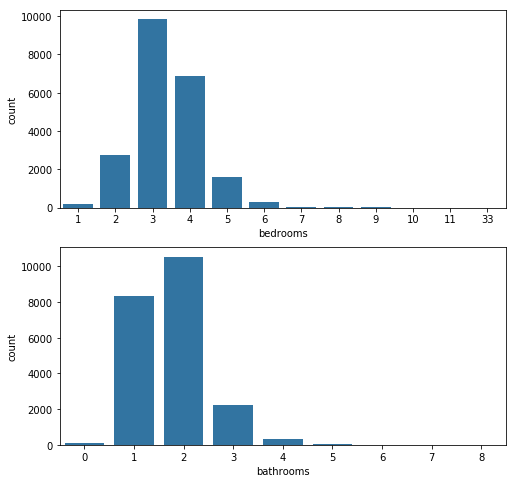

In [23]:
# plot the distribution of bedrooms and bathrooms variables

# convert bethroom variable to integer data type


fig, ax = plt.subplots(nrows=2, figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'bedrooms', color = default_color, ax = ax[0])
sb.countplot(data = df, x = 'bathrooms', color = default_color, ax = ax[1])

plt.show()

Most houses have three to four bedrooms and one to two bathrooms. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>  The price variable took on a large range of values, so I looked at the data using a log transform. Under the transformation which was done after setting limit on x-axis, the data looked bimodal, with one peak between 300,000 and 500,000

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The square footage variable is skewed to the right, so to set limit on x-axis to zoom in on where most data points lie and I found that the square footage of most houses lies between 1000 and 2500. 

## Bivariate Exploration



I will start bivariate exploration by looking at the pairwise correlations present between features in the data.


In [24]:
numeric_vars = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors','view', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15']
categoric_vars = ['waterfront', 'condition', 'grade']

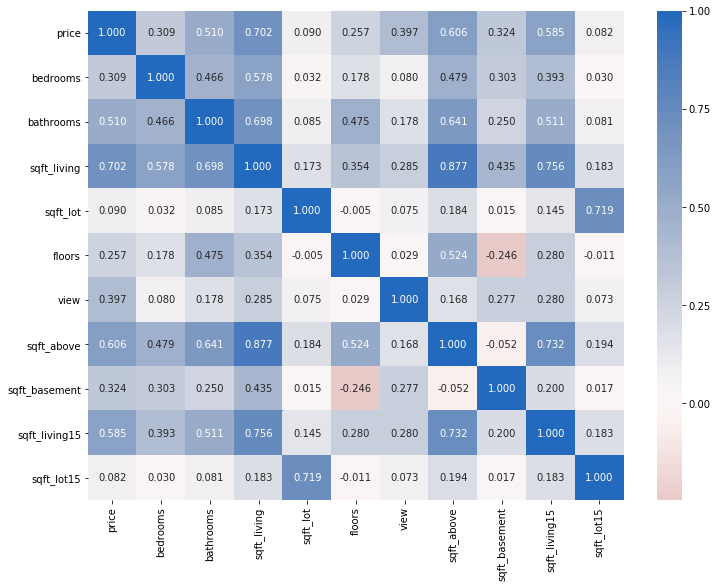

In [25]:
# correlation plot
plt.figure(figsize = [12, 9])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

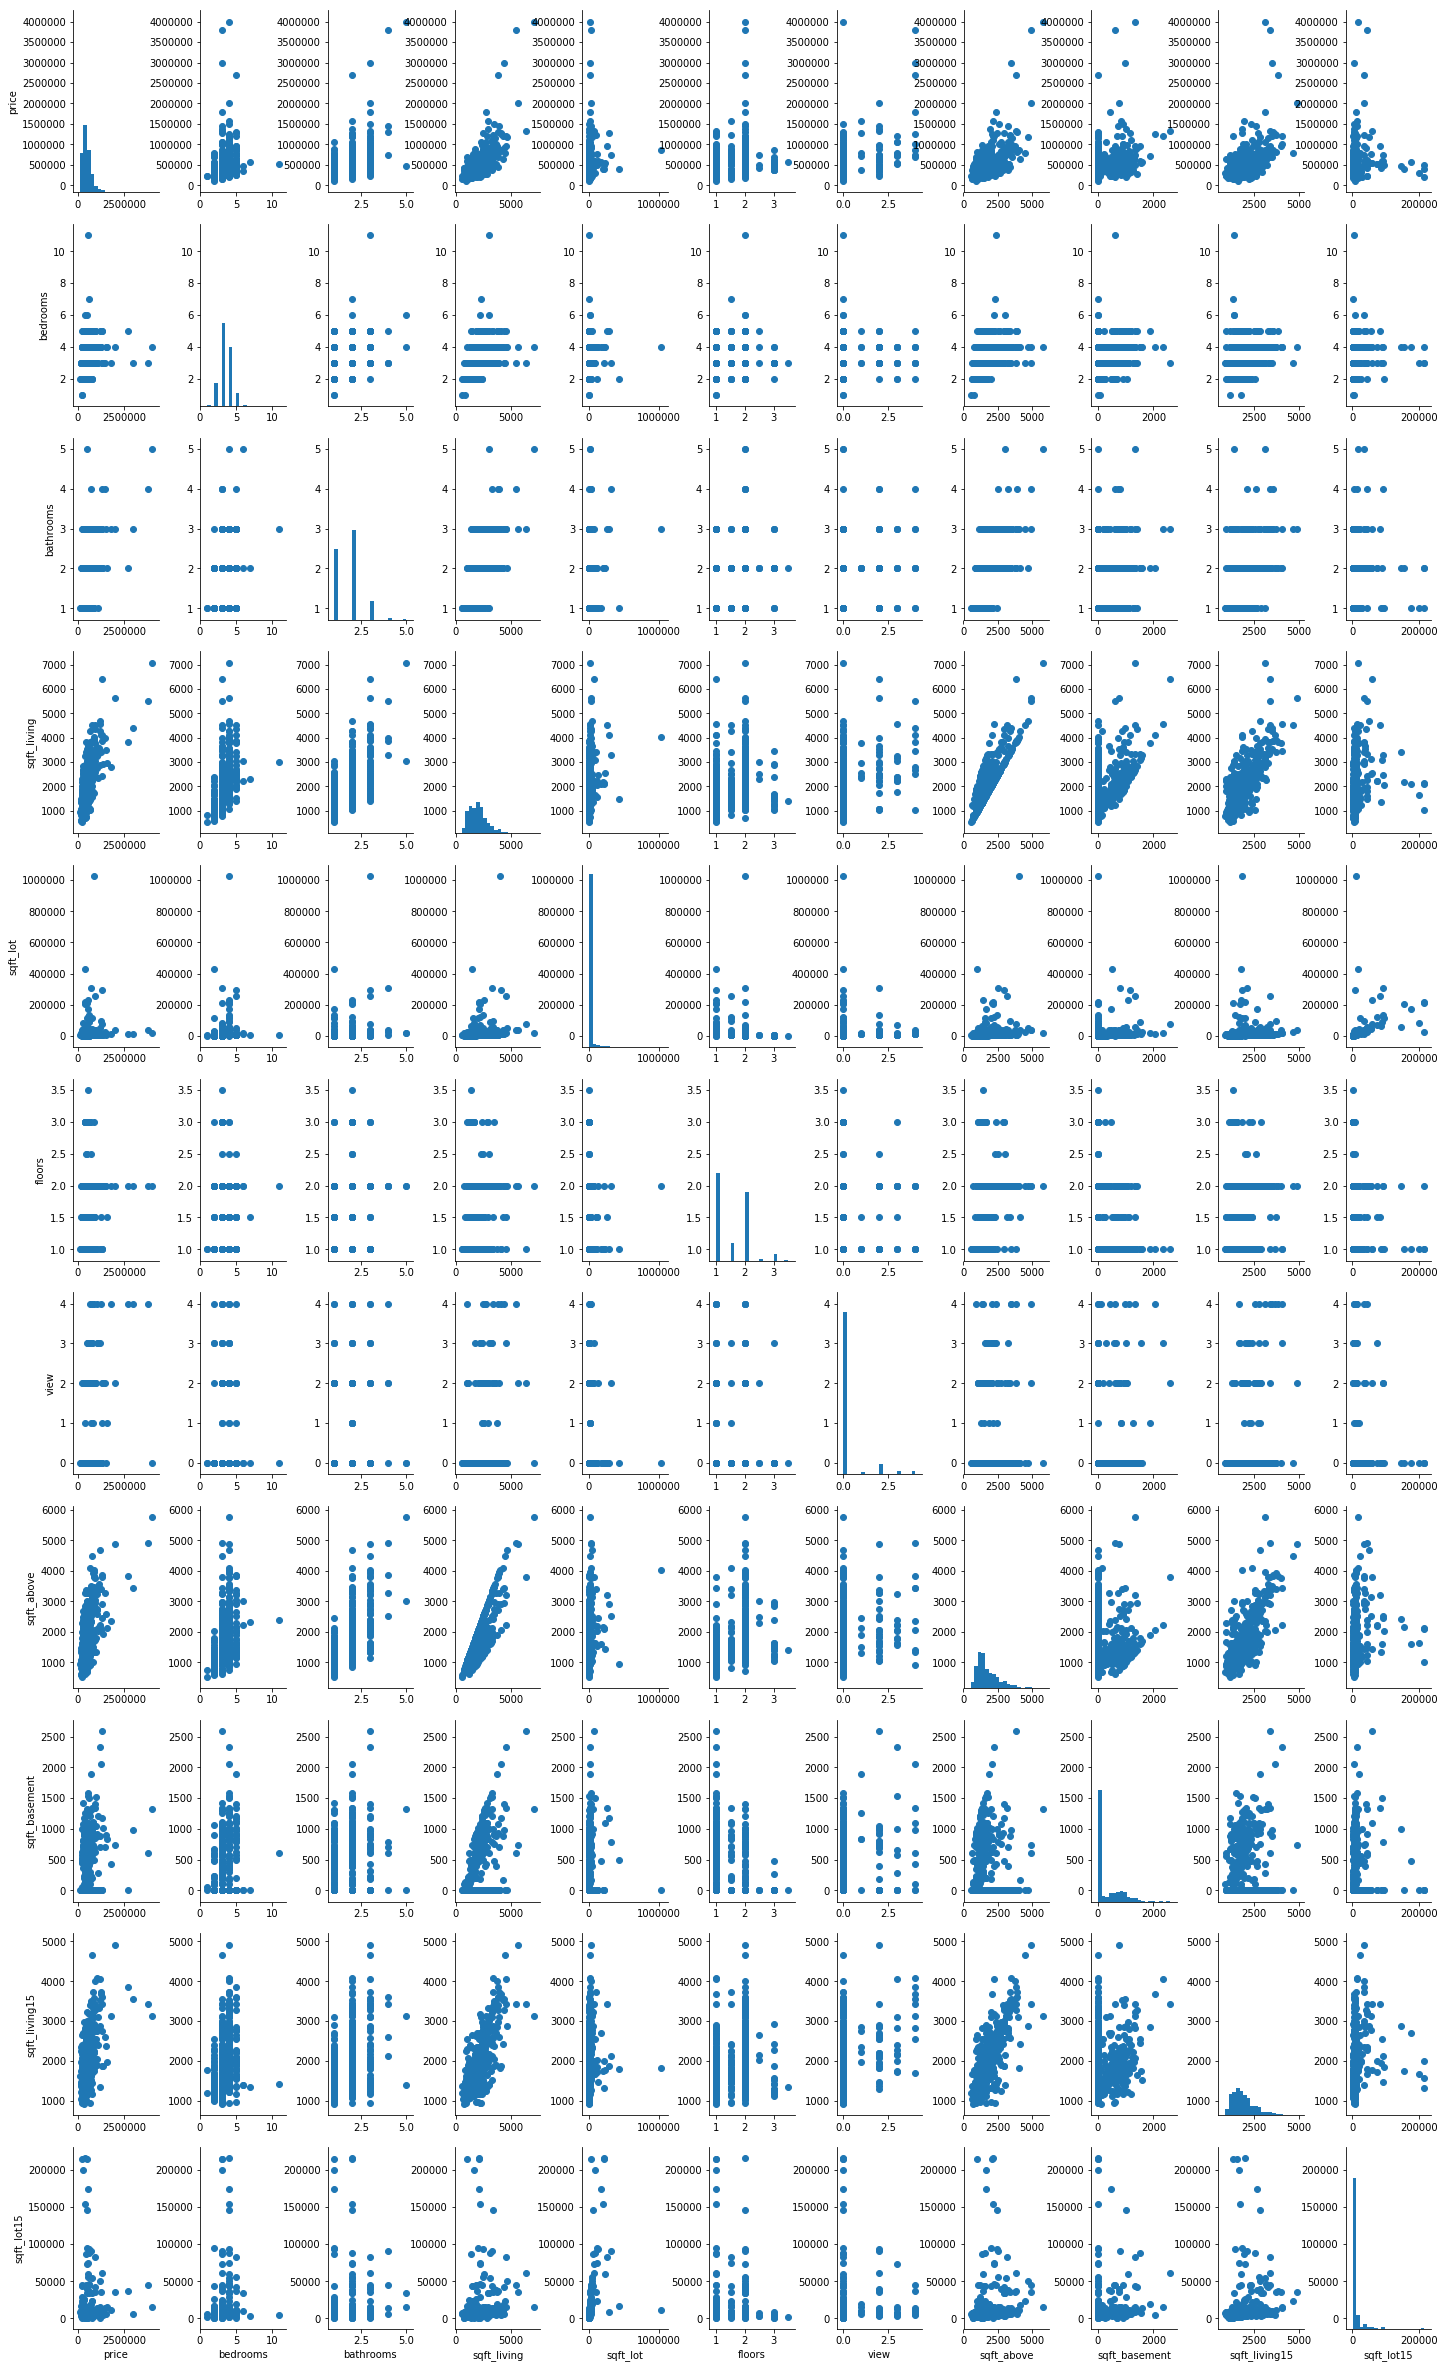

In [26]:
# plot matrix: sample 500 houses so that plots are clearer and
# they render faster
samples = np.random.choice(df.shape[0], 500, replace = False)
df_samp = df.loc[samples,:]


g = sb.PairGrid(data = df_samp, vars = numeric_vars, size = 3, aspect = 0.6)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)


sqft_living, the square footage of the home is strongly correlated with other square footage variables such sqft_above,
       and sqft_living15, and moderately correlated with sqft_basement . <br>

There is a positive correlation between price and the square footage variables especially sqft_living and sqft_above, the relationship of each of these two variables with price is strongly positive. The higher the total  square footage of a house, the higher the price and vise-versa. <br>

There's also a moderate positive correlation between price and floors in the house. Bedrooms, bathrooms and views also have moderate correlation with price. 

Let's look at price correlation with categorical variables.  

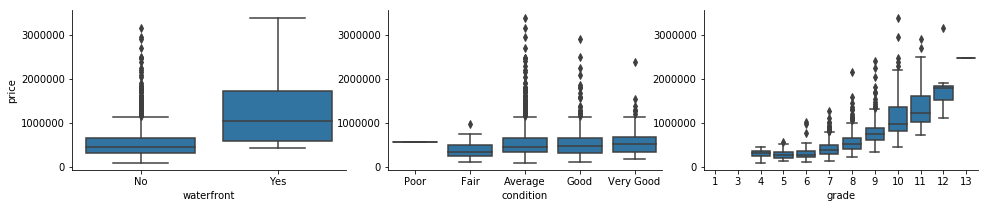

In [27]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(df.shape[0], 2000, replace = False)
df_samp = df.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_samp, y_vars = ['price'], x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

In [28]:
print((df['condition'] == 'Poor').sum())
print((df['condition'] == 'Fair').sum())

30
172


There are positive relationships between price and the categorical variables. 
This relationship is more noticiable between price and grade. Price generally increase with the general condition of the house. However, the median price of house in a poor condition is slightly higher than house in a fair condition. This could be as  a result of lower data points of houses in a poor condition compared to houses in a fair condition.  <br>

Also house that has  a waterfront has a far higher average price compared to house without a waterfront. 

The sqft_living variable i.e the square footage of the house has the strongest relationship with price. Let's investigate  this relationship further. 

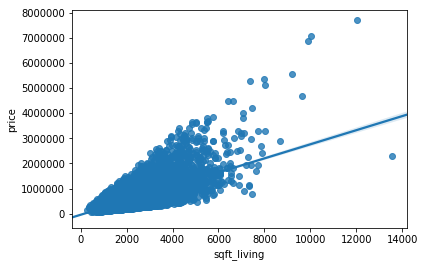

In [29]:
sb.regplot(data = df, x = 'sqft_living', y = 'price');
plt.xlabel('sqft_living')
plt.ylabel('price');

let's add trasparency and a jitter to make the strength of the relationship more clearer.

In [30]:
# compute the logarithm of price and sqft_living to make multivariate plotting easier
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
    
df['log_price'] = df['price'].apply(log_trans)
df['log_sqft_living'] = df['sqft_living'].apply(log_trans)

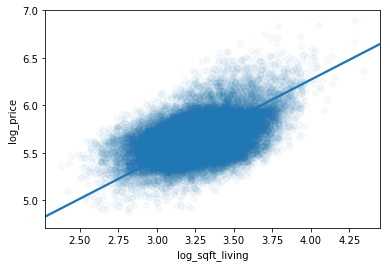

In [31]:
# scatter plot of price vs. sqft_living, with log transform on price axis and
# sqft_living axis
sb.regplot(data = df, x = 'log_sqft_living', y = 'log_price', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/30});


We observe here again that there's a positive relationship between price and sqft_living: 
the higher the size of the footage of a house, the higher the price.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Price has a higher correlation with sqft_living i.e the square footage of the home. This relationship becomes more clearer after log tarnsformation is performed on the two variables, then transparency and a jitter is added to the plot that depicts the relationship between the two variables. <br>
 

> Grade, waterfront and condition, which are the categorical variables of interest, have moderate to high correlations with price.   <br>

> Other variables of interest i.e the number of bedrooms and the number bathrooms have moderate correlation with price.<br>

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Other than its relationship with the sqft_living i.e the square footage of the home, there are also high correlations between price and other square footage varaibles such as sqft_above, sqft_living15. 

## Multivariate Exploration



Let's explore how condition plays a part in the relationship between price and sqft_living.

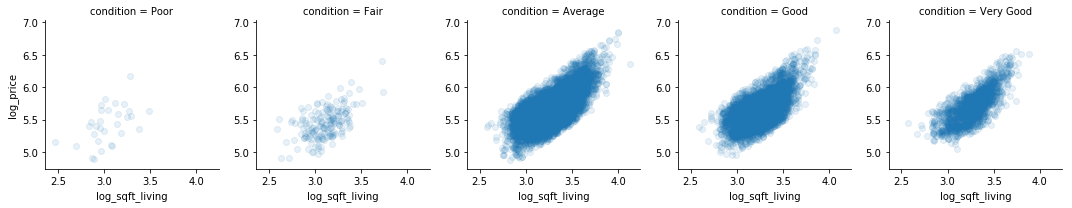

In [32]:
# create a facet grid on levels of conditions.
g = sb.FacetGrid(data = df, col = 'condition',
                margin_titles = True)
g.map(plt.scatter, 'log_sqft_living', 'log_price', alpha = 1/10);

We can observe from this chart how houses in poor and fair conditions have lower square footages and lower prices. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I extended my investigation of price against square footage size in this section by looking at the impact of one categorical feature, the condition variable. The multivariate exploration here showed that there indeed is a positive effect of increased house condition on house price. The square footage size is higher in house in a better condition, and it's  generally higher-priced.  

### Were there any interesting or surprising interactions between features?

> The interactions played out as expected. Generally, house in a better condition and more spacious has a higher price.  

## Conclusions


The main objective of this explorative analysis is to figure out what features are best for predicting the house sales price in the dataset. <br>

The analysis showed that the sqft_living variable i.e the square footage size of the house has the strongest relationship with price. The relationship between these variables is positive and we were able to see it more clearly after a log transformation  was performed on both variables, and transparency and jitter employed on the plot to make their scatterplot more informative. <br>

We also saw that increased house condition has a positive effect on price when we plotted the three categorical variables of interest namely waterfront, grade and condition on price. Among the 3 categorical features, we saw that grade has a more stronger relationship with price. <br>

The investigation of price against square footage size was extended by looking at the impact of the condition variable. The multivariate analysis showed that there indeed is a positive effect of increased house condition on house price.

